<a href="https://colab.research.google.com/github/CiciWang1230/BHFinalProject/blob/main/BHFinalProj.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [56]:
import numpy as np
import matplotlib.pyplot as plt
import requests
import math

baseUrl = 'http://www.tng-project.org/api/'
headers = {"api-key":"128de4248c745e040927ee558a9bcd62"} #this is my (Jack) API key btw

def get(path, params=None):
    # make HTTP GET request to path
    r = requests.get(path, params=params, headers=headers)

    # raise exception if response code is not HTTP SUCCESS (200)
    r.raise_for_status()

    if r.headers['content-type'] == 'application/json':
        return r.json() # parse json responses automatically
    return r

r = get(baseUrl)
r.keys()
names = [sim['name'] for sim in r['simulations']]

#defining the "sim" function for TNG100-1
i = names.index('TNG300-1')
sim = get( r['simulations'][i]['url'])



In [57]:
#defining redshift values we are testing, etc
redshifts = [0, 0.5, 1, 1.5, 2, 2.5, 3, 3.5, 4, 4.5, 5, 5.5, 6]
sfrData = []
fractSubhalosUsed = 1.0

In [78]:
snaps = get(sim['url'] + 'snapshots/')

#Looping through all the snapshots to find the exact snapshots corresponding to the redshifts we're sampling
l=0
#redshifts with intervals of 0.5
snapz_00 = 0
snapz_05 = 0
snapz_10 = 0
snapz_15 = 0
snapz_20 = 0
snapz_25 = 0
snapz_30 = 0
snapz_35 = 0
snapz_40 = 0
snapz_45 = 0
snapz_50 = 0
snapz_55 = 0
snapz_60 = 0



#function for the ones in intervals of 0.5
while l < len(snaps):
  lval = float("{:.1f}".format(snaps[l]['redshift']))
  if lval == 0.0:
    snapz_00 = l
  elif lval == 0.5:
    snapz_05 = l
  elif lval == 1.0:
    snapz_10 = l
  elif lval == 1.5:
    snapz_15 = l
  elif lval == 2.0:
    snapz_20 = l
  #elif lval == 2.5:
    #snapz_25 = l
  elif lval == 3.0:
    snapz_30 = l
  elif lval == 3.5:
    snapz_35 = l
  elif lval == 4.0:
    snapz_40 = l
  #elif lval == 4.5:
    #snapz_45 = l
  elif lval == 5.0:
    snapz_50 = l
  elif lval == 5.5:
    snapz_55 = l
  elif lval == 6.0:
    snapz_60 = l
  l = l+1

snapz_25 = 29
snapz_45 = 19


snapzlist = [snapz_00, snapz_05, snapz_10, snapz_15, snapz_20, snapz_25, snapz_30, snapz_35, snapz_40, snapz_45, snapz_50, snapz_55, snapz_60]

In [79]:
print(snapzlist)
print(snapzlist[9])

print(snaps[99])
print(snaps[69])
print(snaps[51])
print(snaps[40])
print(snaps[25])
print(snaps[23])
print(snaps[21])
print(snaps[0])
print(snaps[17])


[99, 69, 51, 40, 33, 29, 25, 23, 21, 19, 17, 15, 13]
19
{'number': 99, 'redshift': 2.22044604925031e-16, 'num_groups_subfind': 14485709, 'url': 'http://www.tng-project.org/api/TNG300-1/snapshots/99/'}
{'number': 69, 'redshift': 0.460917794180647, 'num_groups_subfind': 15730960, 'url': 'http://www.tng-project.org/api/TNG300-1/snapshots/69/'}
{'number': 51, 'redshift': 0.950531351585033, 'num_groups_subfind': 17011761, 'url': 'http://www.tng-project.org/api/TNG300-1/snapshots/51/'}
{'number': 40, 'redshift': 1.49551216649556, 'num_groups_subfind': 18144028, 'url': 'http://www.tng-project.org/api/TNG300-1/snapshots/40/'}
{'number': 25, 'redshift': 3.00813107163038, 'num_groups_subfind': 19381738, 'url': 'http://www.tng-project.org/api/TNG300-1/snapshots/25/'}
{'number': 23, 'redshift': 3.49086136926065, 'num_groups_subfind': 19206013, 'url': 'http://www.tng-project.org/api/TNG300-1/snapshots/23/'}
{'number': 21, 'redshift': 4.00794511146527, 'num_groups_subfind': 18363039, 'url': 'http://

In [80]:
#parameters for the search
params = {'limit': 100, 'order_by': '-mass_stars'}

#this returns a list of subhalos for a given redshift (input value), for bulk data retrieval
def subhalos(z):
  x = int(2*z)
  subhalos_url = snaps[snapzlist[x]]['url'] + 'subhalos/'
  return get(subhalos_url, params)

#function to pick a sample of subhalos using the above function, also for bulk data retrieval; fix
def pickSampledSubs(z):
  #subhalo_list = subhalos(z)['results']
  #sampledSubs = np.random.choice(subhalo_list, size=int(len(subhalo_list)*fractSubhalosUsed), replace=False)
  subhalo_list = subhalos(z)['results']
  sampledSubs = subhalo_list
  return sampledSubs

In [81]:
#function to find the subhalo arrays
def findSFR(y): #input an array of subhalos (ie from pick sampled subs)
  sfrs = []
  i=0
  for i in range(0,len(y)):
    samplesubsfr = y[i]['sfr']
    sfrs.append(samplesubsfr)
    i=i+1
  return sfrs

  #im thinking that if we need to filter out some 0 or NaN values from the sfrs we can make a mask to do that; im not super familiar with masks and also based on what i've tested it doesn't seem necessary

In [82]:
#actually getting data:

#sampling subhalos
samplesubs_z00 = pickSampledSubs(0)
samplesubs_z05 = pickSampledSubs(0.5)
samplesubs_z10 = pickSampledSubs(1)
samplesubs_z15 = pickSampledSubs(1.5)
samplesubs_z20 = pickSampledSubs(2)
samplesubs_z25 = pickSampledSubs(2.5)
samplesubs_z30 = pickSampledSubs(3)
samplesubs_z35 = pickSampledSubs(3.5)
samplesubs_z40 = pickSampledSubs(4)
samplesubs_z45 = pickSampledSubs(4.5)
samplesubs_z50 = pickSampledSubs(5)
samplesubs_z55 = pickSampledSubs(5.5)
samplesubs_z60 = pickSampledSubs(6)


#finding their sfr's
sfr_z00 = findSFR(samplesubs_z00)
sfr_z05 = findSFR(samplesubs_z05)
sfr_z10 = findSFR(samplesubs_z10)
sfr_z15 = findSFR(samplesubs_z15)
sfr_z20 = findSFR(samplesubs_z20)
sfr_z25 = findSFR(samplesubs_z25)
sfr_z30 = findSFR(samplesubs_z30)
sfr_z35 = findSFR(samplesubs_z35)
sfr_z40 = findSFR(samplesubs_z40)
sfr_z45 = findSFR(samplesubs_z45)
sfr_z50 = findSFR(samplesubs_z50)
sfr_z55 = findSFR(samplesubs_z55)
sfr_z60 = findSFR(samplesubs_z60)

#between the sfr finding, WE HAVE TO FILTER OUT 0'S AND RECORD WHAT WE HAVE FILTERED OUT!!!

while 0 in sfr_z00:
    sfr_z00.remove(0)

while 0 in sfr_z05:
      sfr_z05.remove(0)

while 0 in sfr_z10:
      sfr_z10.remove(0)

while 0 in sfr_z15:
      sfr_z15.remove(0)

while 0 in sfr_z25:
      sfr_z25.remove(0)

while 0 in sfr_z30:
      sfr_z30.remove(0)

while 0 in sfr_z35:
      sfr_z35.remove(0)

while 0 in sfr_z40:
      sfr_z40.remove(0)

while 0 in sfr_z45:
      sfr_z45.remove(0)

while 0 in sfr_z50:
      sfr_z50.remove(0)

while 0 in sfr_z55:
      sfr_z55.remove(0)

while 0 in sfr_z60:
      sfr_z60.remove(0)




'''
if 0 in sfr_z05:
  sfr_z05.remove(0)
if 0 in sfr_z10:
  sfr_z10.remove(0)
if 0 in sfr_z15:
  sfr_z15.remove(0)
if 0 in sfr_z20:
  sfr_z20.remove(0)
if 0 in sfr_z25:
  sfr_z25.remove(0)
if 0 in sfr_z30:
  sfr_z30.remove(0)
if 0 in sfr_z35:
  sfr_z35.remove(0)
if 0 in sfr_z40:
  sfr_z40.remove(0)
if 0 in sfr_z45:
  sfr_z45.remove(0)
if 0 in sfr_z50:
  sfr_z50.remove(0)
if 0 in sfr_z55:
  sfr_z55.remove(0)
if 0 in sfr_z60:
  sfr_z60.remove(0)
'''

'\nif 0 in sfr_z05:\n  sfr_z05.remove(0)\nif 0 in sfr_z10:\n  sfr_z10.remove(0)\nif 0 in sfr_z15:\n  sfr_z15.remove(0)\nif 0 in sfr_z20:\n  sfr_z20.remove(0)\nif 0 in sfr_z25:\n  sfr_z25.remove(0)\nif 0 in sfr_z30:\n  sfr_z30.remove(0)\nif 0 in sfr_z35:\n  sfr_z35.remove(0)\nif 0 in sfr_z40:\n  sfr_z40.remove(0)\nif 0 in sfr_z45:\n  sfr_z45.remove(0)\nif 0 in sfr_z50:\n  sfr_z50.remove(0)\nif 0 in sfr_z55:\n  sfr_z55.remove(0)\nif 0 in sfr_z60:\n  sfr_z60.remove(0)\n'

In [83]:

print(sfr_z25)
print(sfr_z45)
#avg sfr for each redshift
avg_sfr_z00 = sum(sfr_z00)/len(sfr_z00)
avg_sfr_z05 = sum(sfr_z05)/len(sfr_z05)
avg_sfr_z10 = sum(sfr_z10)/len(sfr_z10)
avg_sfr_z15 = sum(sfr_z15)/len(sfr_z15)
avg_sfr_z20 = sum(sfr_z20)/len(sfr_z20)
avg_sfr_z25 = sum(sfr_z25)/len(sfr_z25)
avg_sfr_z30 = sum(sfr_z30)/len(sfr_z30)
avg_sfr_z35 = sum(sfr_z35)/len(sfr_z35)
avg_sfr_z40 = sum(sfr_z40)/len(sfr_z40)
avg_sfr_z45 = sum(sfr_z45)/len(sfr_z45)
avg_sfr_z50 = sum(sfr_z50)/len(sfr_z50)
avg_sfr_z55 = sum(sfr_z55)/len(sfr_z55)
avg_sfr_z60 = sum(sfr_z60)/len(sfr_z60)

#initializing numpy array containing sfr's; ie sfrData
#sfrData = np.array([avg_sfr_z00,avg_sfr_z05])

'''
print(sfrData)
L = []
for i in [00,05,10,15,20,25,30,35,40,45,50,55,60]:
  if avg_sfr_z{i} != 0:
    L.append(avg_sfr_z{i})

sfrData = np.array(L)
'''
sfrData = np.array([avg_sfr_z00,avg_sfr_z05,avg_sfr_z10,avg_sfr_z15,avg_sfr_z20,avg_sfr_z25, avg_sfr_z30, avg_sfr_z35, avg_sfr_z40, avg_sfr_z45, avg_sfr_z50, avg_sfr_z55, avg_sfr_z60])


[25.6924, 44.56, 75.71, 855.711, 30.5246, 28.5375, 3.48289, 7.59355, 15.284, 17.1042, 110.037, 9.11532, 125.016, 21.2574, 6.10013, 21.0982, 9.27812, 42.6064, 56.5618, 40.621, 40.1231, 3.55162, 2.09772, 82.3687, 5.39951, 5.05657, 38.3716, 10.6, 8.66633, 6.99858, 32.8856, 47.31, 148.454, 49.6075, 8.45314, 17.1009, 67.6523, 72.3811, 10.2665, 57.2603, 85.6269, 33.6112, 38.8076, 6.92302, 33.8315, 45.7764, 8.83814, 42.2568, 10.4098, 48.7591, 1.63596, 19.5605, 7.43051, 7.5575, 3.2486, 8.32632, 57.2907, 12.2734, 5.79699, 61.6916, 7.52877, 17.6592, 36.2466, 2.70336, 12.9653, 15.8763, 41.0941, 28.6438, 18.388, 28.4923, 32.4157, 69.2504, 46.2556, 30.3952, 0.734498, 2.14929, 50.8727, 97.6033, 552.486, 11.1963, 198.844, 66.1305, 17.9232, 116.78, 28.4776, 38.8445, 11.1843, 105.273, 4.03598, 9.25146, 27.2047, 205.347, 5.41057, 34.7478, 8.41856, 31.7734, 7.6743, 7.55395, 11.8384, 221.231]
[700.942, 646.855, 504.323, 769.783, 543.548, 532.262, 536.327, 965.362, 712.739, 428.453, 447.929, 277.572, 930.6

In [84]:
from os import lchown
print(f"Number of subhalos at z=2.5: {len(samplesubs_z25)}")
print(f"Number of subhalos at z=4.5: {len(samplesubs_z45)}")
print(f"Average SFR at z=2.5: {avg_sfr_z25}")
print(f"Average SFR at z=4.5: {avg_sfr_z45}")

print(f"Subhalos at z=2.5: {samplesubs_z25}")
print(f"Subhalos at z=4.5: {samplesubs_z45}")
print("----")
print(f"Subhalos at z=2.5: {snaps[snapzlist[5]]['url']}")
print(f"Subhalos at z=4.5: {snaps[snapzlist[9]]['url']}")
print(f"Subhalos at z=2.5: {subhalos(2.5)}")
print(f"Subhalos at z=4.5: {subhalos(4.5)}")

Number of subhalos at z=2.5: 100
Number of subhalos at z=4.5: 100
Average SFR at z=2.5: 50.61050058
Average SFR at z=4.5: 379.38966199999993
Subhalos at z=2.5: [{'id': 1954, 'sfr': 25.6924, 'mass_log_msun': 13.821079903480298, 'url': 'http://www.tng-project.org/api/TNG300-1/snapshots/29/subhalos/1954/'}, {'id': 3206, 'sfr': 44.56, 'mass_log_msun': 13.656783786040393, 'url': 'http://www.tng-project.org/api/TNG300-1/snapshots/29/subhalos/3206/'}, {'id': 703, 'sfr': 75.71, 'mass_log_msun': 13.78042340821062, 'url': 'http://www.tng-project.org/api/TNG300-1/snapshots/29/subhalos/703/'}, {'id': 4149, 'sfr': 855.711, 'mass_log_msun': 13.600048636251536, 'url': 'http://www.tng-project.org/api/TNG300-1/snapshots/29/subhalos/4149/'}, {'id': 14241, 'sfr': 30.5246, 'mass_log_msun': 13.331142360612597, 'url': 'http://www.tng-project.org/api/TNG300-1/snapshots/29/subhalos/14241/'}, {'id': 2559, 'sfr': 28.5375, 'mass_log_msun': 13.513727836028979, 'url': 'http://www.tng-project.org/api/TNG300-1/snaps

KeyboardInterrupt: 

[  1.52014359   9.87995237  22.33768496  39.52347708  47.87859582
  50.61050058 148.8778157  377.2304206  447.463555   379.389662
 301.642236   224.451757   198.611095  ]


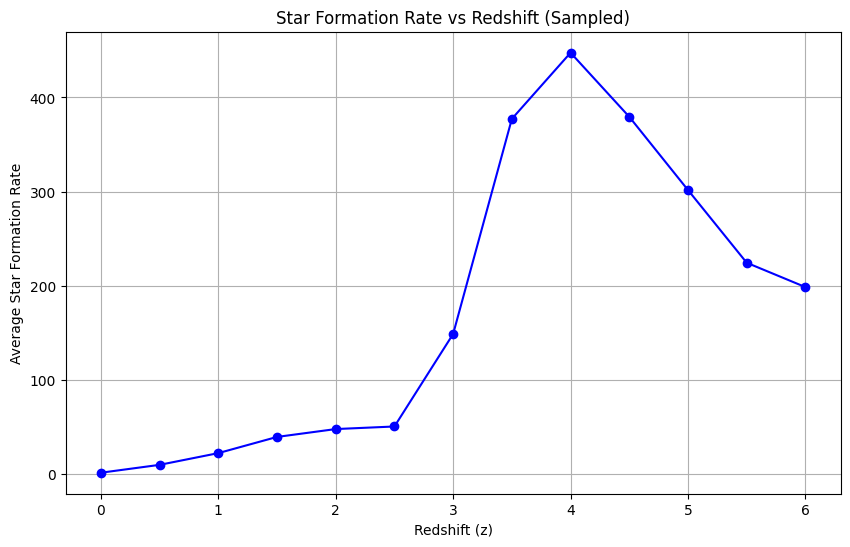

In [85]:
#plotting sfr vs redshift =)
print(sfrData)
plt.figure(figsize=(10, 6))
plt.plot(redshifts, sfrData, marker='o', linestyle='-', color='blue')
plt.xlabel('Redshift (z)')
plt.ylabel('Average Star Formation Rate')
plt.title('Star Formation Rate vs Redshift (Sampled)')
plt.grid(True)
plt.show()